In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/milkquality/milknew.csv')

In [4]:
data.head() # view the first 5 rows of data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
data.shape # view size of dataset

(1059, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [14]:
data.isnull().sum() # check for null values

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

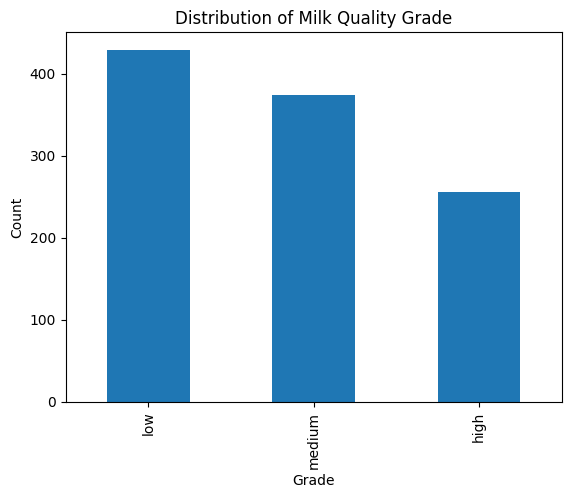

In [11]:
data['Grade'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Milk Quality Grade')
plt.ylabel('Count')
plt.show()

There are more data of milk with low and medium quality than that of high quality.

<Axes: xlabel='pH', ylabel='count'>

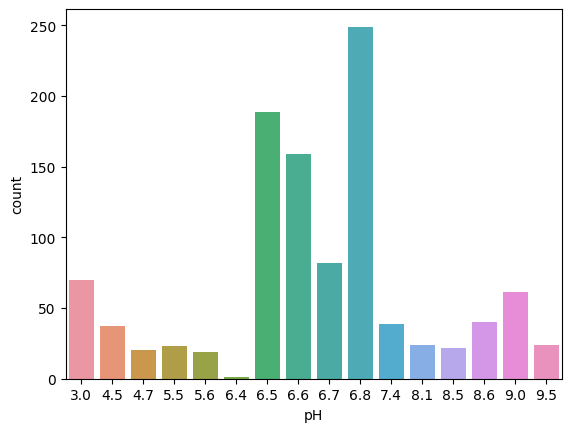

In [21]:
sns.countplot(x = data['pH'], data = data)

From above, it can be seen that pH of milk ranges from 3 to 9.5 with the highest at around 6.5 to 6.8

<Axes: xlabel='Temprature', ylabel='count'>

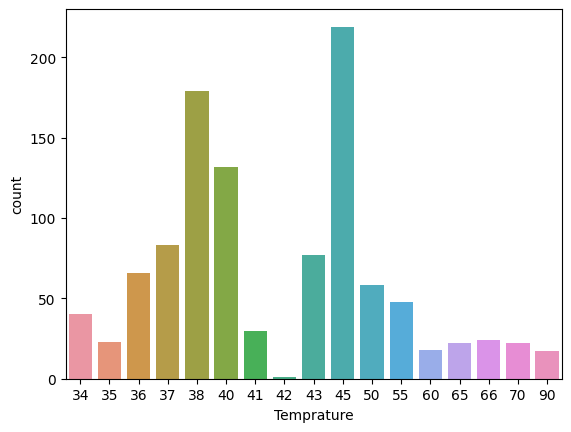

In [23]:
sns.countplot(x = data['Temprature'], data = data)

The temprature of milk ranges from 34 degrees to 90 degrees

<Axes: xlabel='Colour', ylabel='count'>

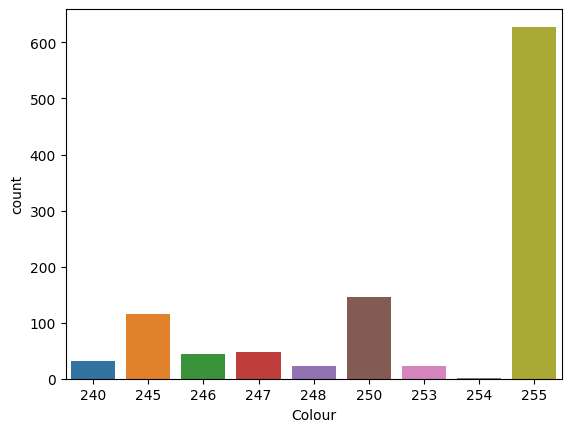

In [25]:
sns.countplot(x = data['Colour'], data = data)

As expected, most milk are white in colour (255).

<Axes: xlabel='Taste', ylabel='count'>

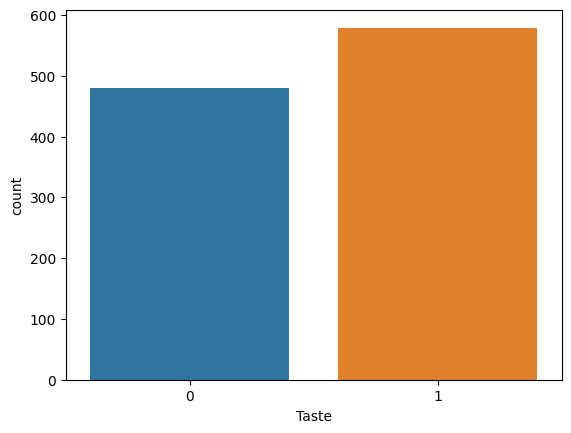

In [26]:
sns.countplot(x = data['Taste'], data = data)

If taste of milk is optimal, it will be assigned a 1 or 0 otherwise. From above data there are more milk with optimal taste than otherwise.

<Axes: xlabel='Odor', ylabel='count'>

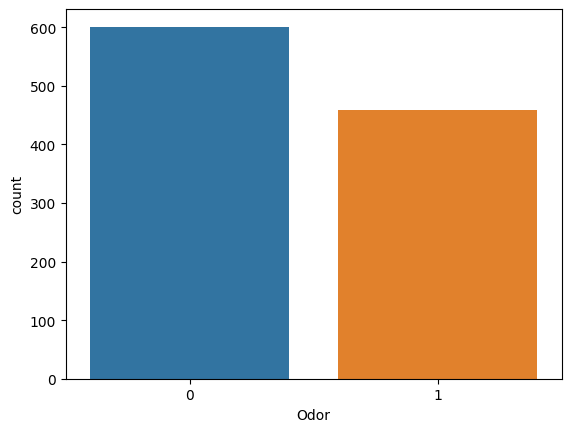

In [27]:
sns.countplot(x = data['Odor'], data = data)

If odor of milk is optimal, it will be assigned a 1 or 0 otherwise. From above data there are more milk with non-optimal odor than otherwise.

<Axes: xlabel='Fat ', ylabel='count'>

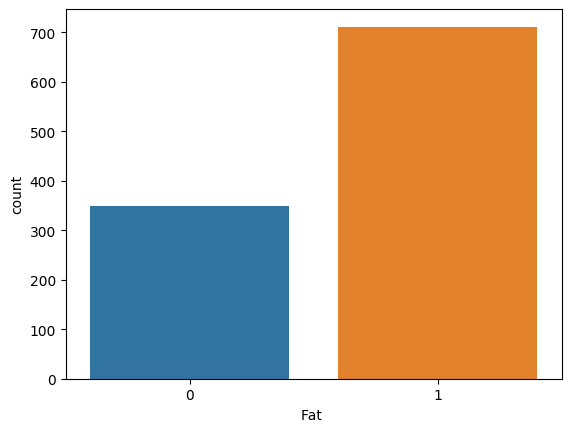

In [32]:
sns.countplot(x = data['Fat '], data = data)

If the milk has optimal amount of fat, it will be assigned a 1 or 0 otherwise. From above data there are more milk with optimal amount of fat.

<Axes: xlabel='Turbidity', ylabel='count'>

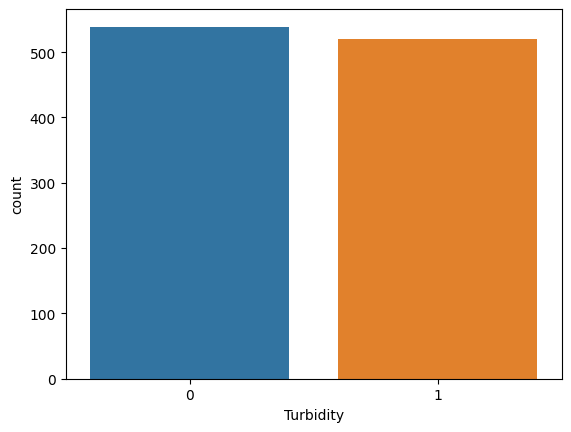

In [33]:
sns.countplot(x = data['Turbidity'], data = data)

If the milk has optimal Turbidity, it will be assigned a 1 or 0 otherwise. From above data there are slightly more milk with non-optimal turbidity.

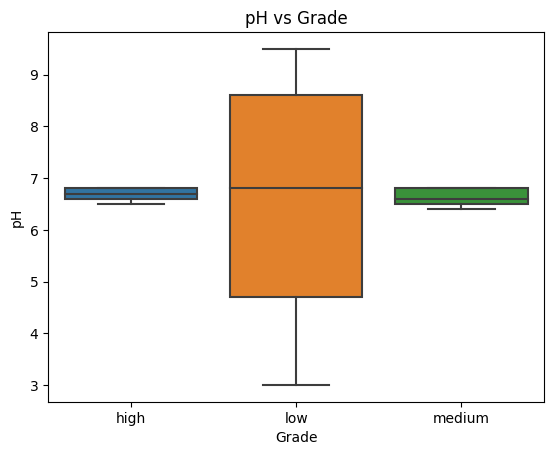

In [37]:
sns.boxplot(data=data, x="Grade", y="pH")
plt.title('pH vs Grade')
plt.xlabel('Grade')
plt.ylabel('pH')
plt.show()

From the above plot, it can be seen that low grade milk has a larger range of pH of 3 to 9.5

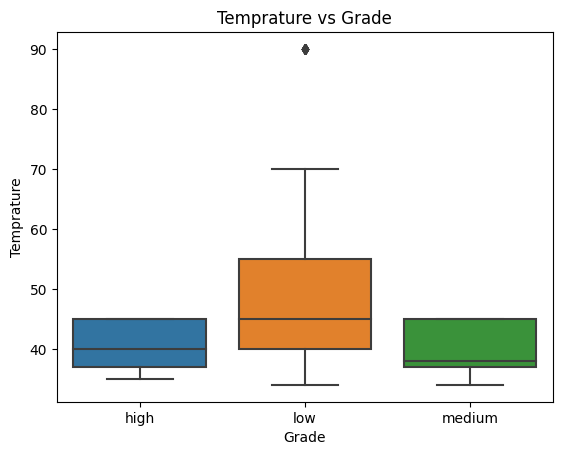

In [38]:
sns.boxplot(data=data, x="Grade", y="Temprature")
plt.title('Temprature vs Grade')
plt.xlabel('Grade')
plt.ylabel('Temprature')
plt.show()

Low grade milk has higher temprature compared to medium and high grade milk.

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Grade']=  le.fit_transform(data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

<Axes: >

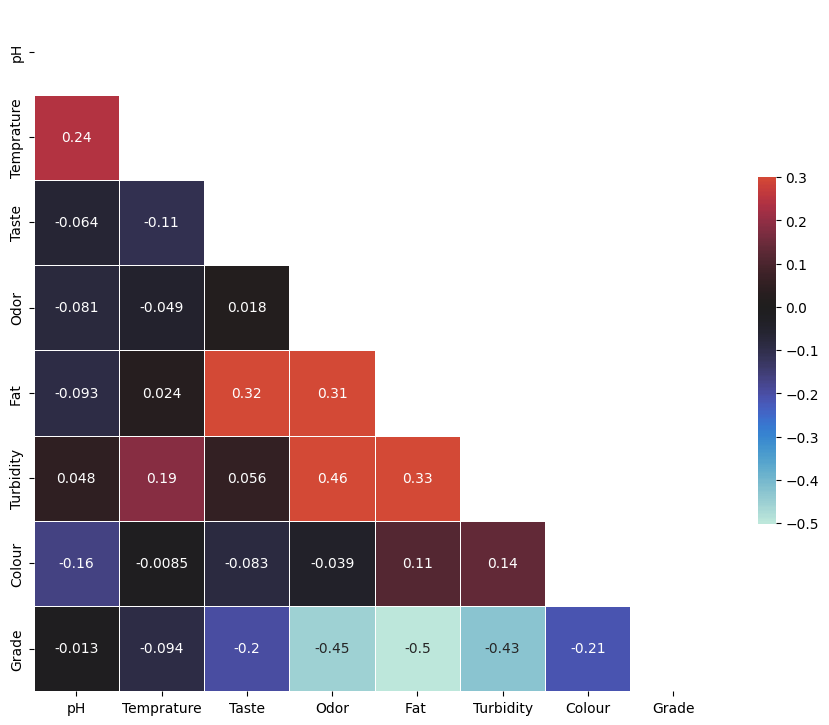

In [42]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask,vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
from sklearn.model_selection import train_test_split

X=data.drop(['Grade'],axis=1)
y=data['Grade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
score=accuracy_score(y_pred,y_train)
print('Training accuracy :', score*100)

Training accuracy : 100.0


In [48]:
y_pred = model.predict(X_test)
score=accuracy_score(y_pred,y_test)
print('Test accuracy :', score*100)

Test accuracy : 99.52830188679245


In [49]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [50]:
y_pred = model.predict(X_train)
score=accuracy_score(y_pred,y_train)
print('Training accuracy :', score*100)

Training accuracy : 94.09681227863047


In [51]:
y_pred = model.predict(X_test)
score=accuracy_score(y_pred,y_test)
print('Test accuracy :', score*100)

Test accuracy : 96.22641509433963
